In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
data={'age':['youth','youth','midage','senior','senior','senior','midage','youth','youth','senior','youth','midage','midage','senior'],
      'income':['high' ,'high','high','medium','low','low','low','medium','low','medium','medium','medium','high','medium'],
      'student':['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
      'credit':['fair','exe','fair','fair','fair','exe','exe','fair','fair','fair','exe','exe','fair','exe'],
      'buy_comp':['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']
}

df=pd.DataFrame(data)
display(df)

,age,income,student,credit,buy_comp
0,youth,high,no,fair,no
1,youth,high,no,exe,no
2,midage,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,exe,no
6,midage,low,yes,exe,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [3]:
data1=pd.DataFrame()
encoders={}
for cols in df.columns:
    encoder=LabelEncoder()
    data1[cols]=encoder.fit_transform(df[cols])
    encoders[cols]=encoder
display(data1)

,age,income,student,credit,buy_comp
0,2,0,0,1,0
1,2,0,0,0,0
2,0,0,0,1,1
3,1,2,0,1,1
4,1,1,1,1,1
5,1,1,1,0,0
6,0,1,1,0,1
7,2,2,0,1,0
8,2,1,1,1,1
9,1,2,1,1,1


In [4]:
encoders['buy_comp'].classes_

array(['no', 'yes'], dtype=object)

In [5]:
x=data1.iloc[:,:-1]
y=data1.iloc[:,-1]

In [19]:
clf=DecisionTreeClassifier(criterion='entropy', random_state=42,)
clf.fit(x,y)


InvalidParameterError: The 'criterion' parameter of DecisionTreeClassifier must be a str among {'log_loss', 'gini', 'entropy'}. Got 'entrory' instead.

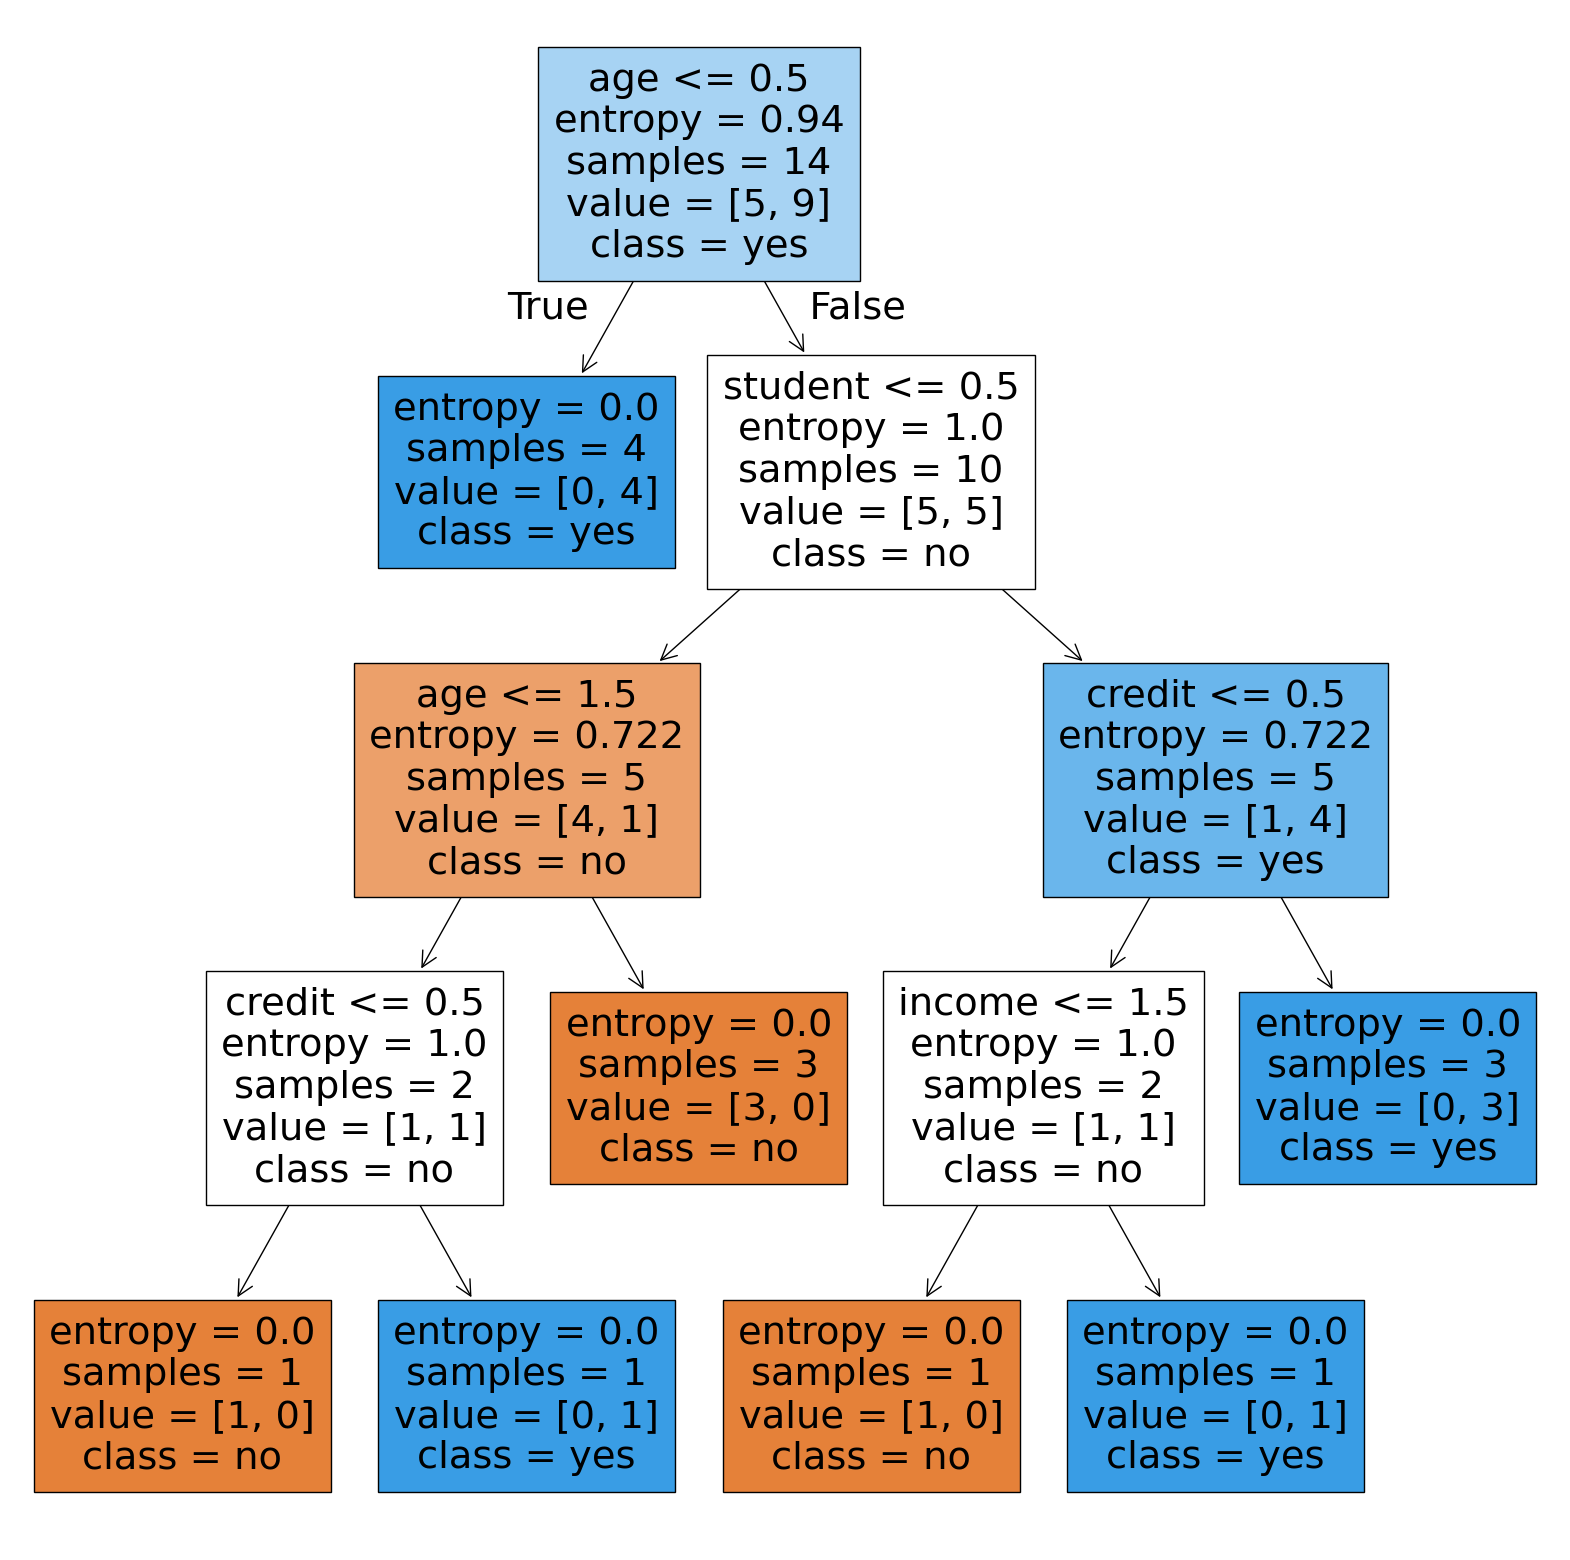

In [7]:
plt.figure(figsize=(20,20))
plot_tree(clf,feature_names=['age','income','student','credit'],
         class_names=encoder.classes_,
         filled=True)
plt.show()

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)
clf1=DecisionTreeClassifier(criterion='entropy', random_state=42)
clf1.fit(xtrain,ytrain)
rules=export_text(clf1,feature_names=['age','income','student','credit'])
print(rules)

|--- student <= 0.50
|   |--- age <= 1.50
|   |   |--- credit <= 0.50
|   |   |   |--- class: 0
|   |   |--- credit >  0.50
|   |   |   |--- class: 1
|   |--- age >  1.50
|   |   |--- class: 0
|--- student >  0.50
|   |--- class: 1



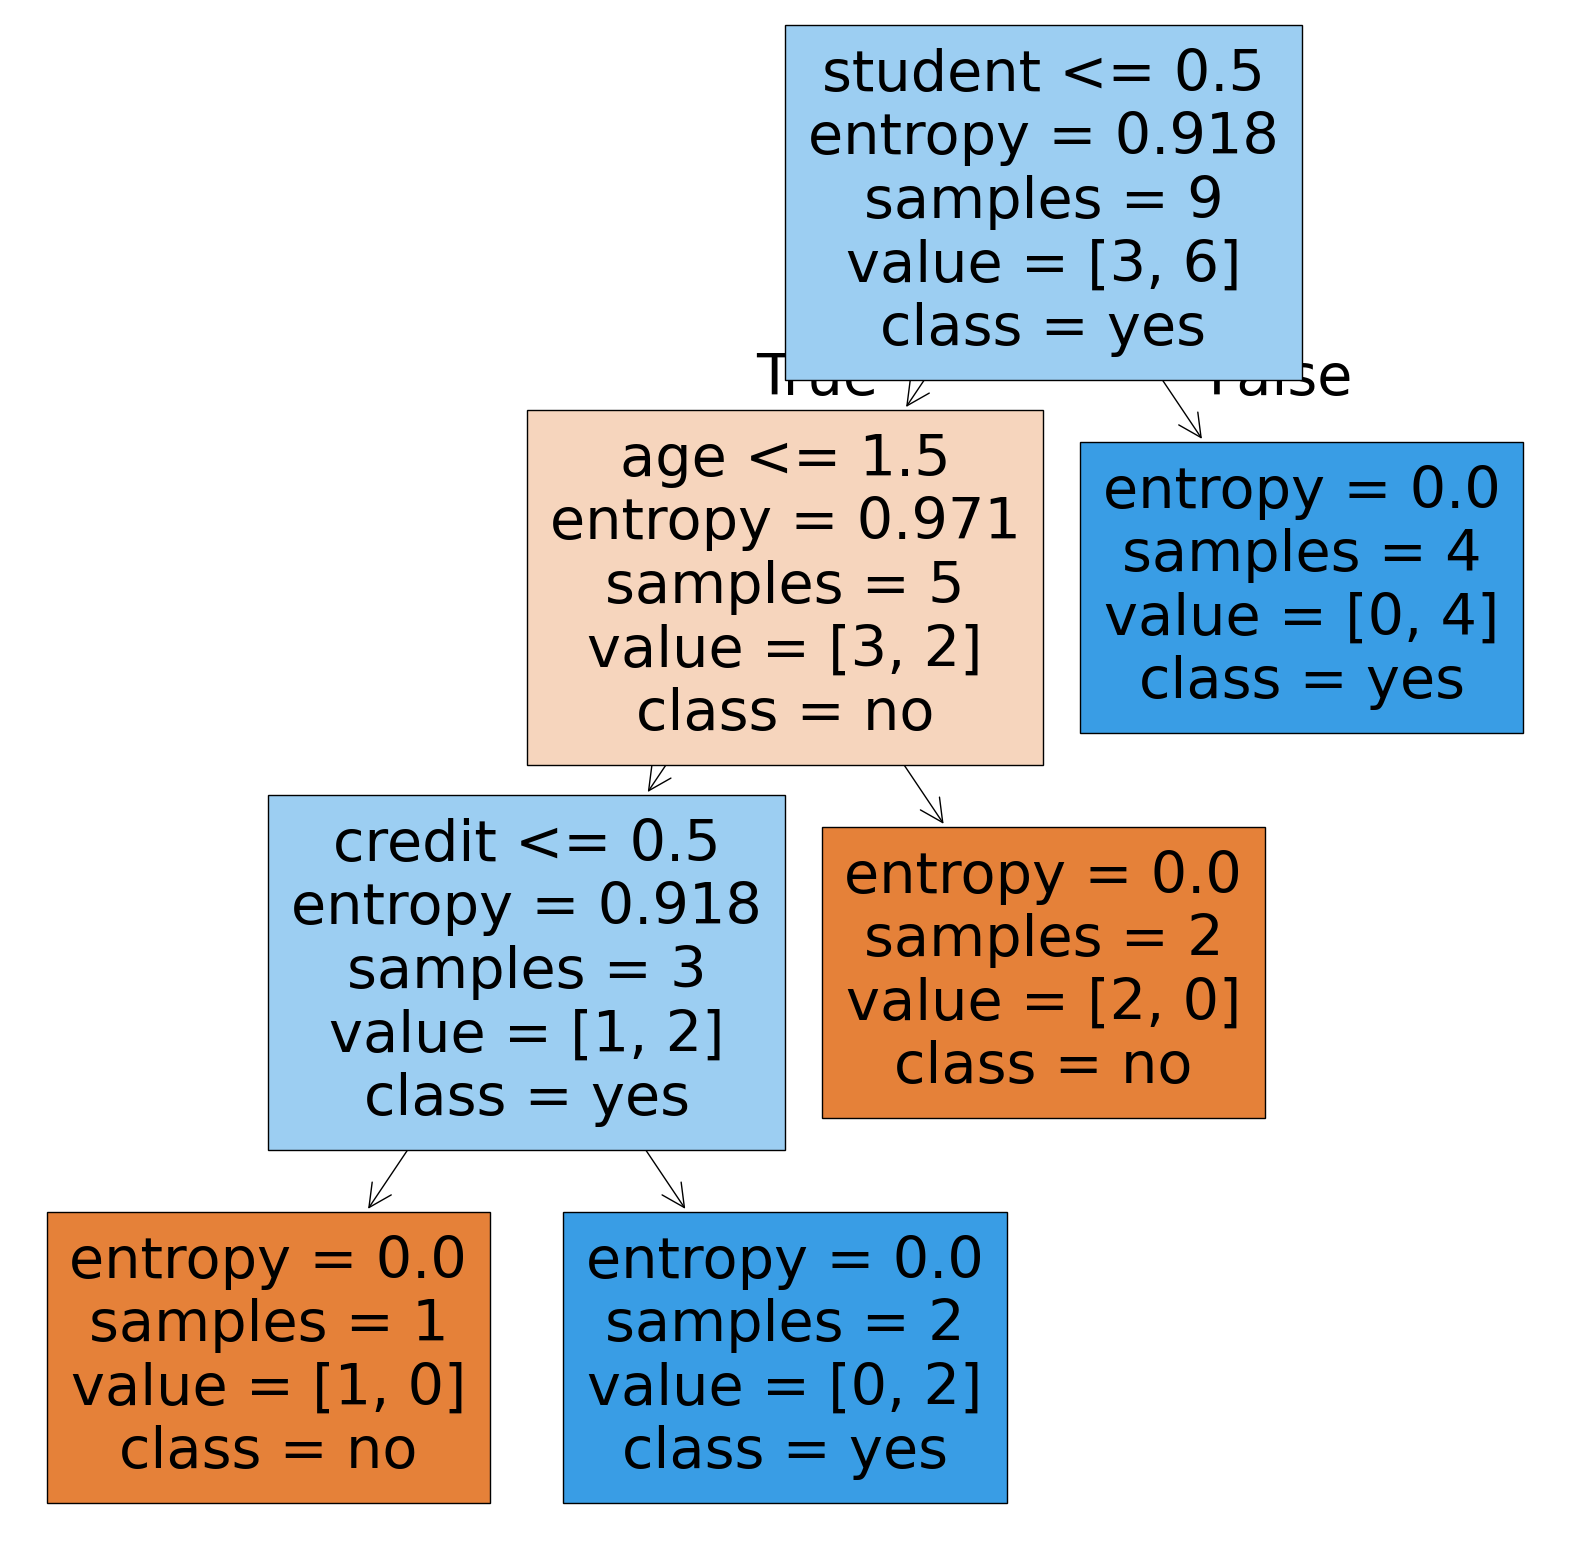

In [25]:
y_pred=clf1.predict(xtest)
plt.figure(figsize=(20,20))
plot_tree(clf1,feature_names=['age','income','student','credit'],class_names=encoder.classes_,filled=True)
plt.show()

In [ ]:
print("Accuracy:",accuracy_score(ytest,y_pred))
print("Classification report:",classification_report(ytest,y_pred))

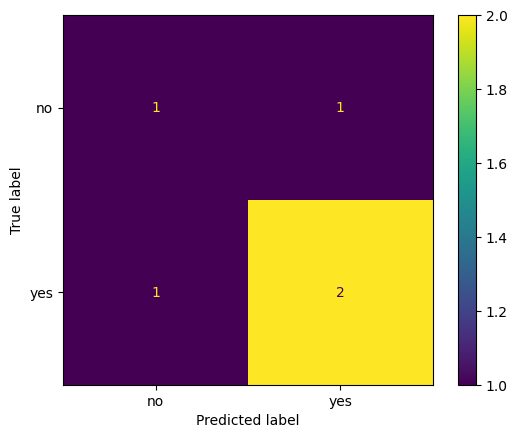

In [246]:
con_mat=confusion_matrix(ytest,y_pred)
"""plt.figure(figsize=(5,5))
sns.heatmap(con_mat,annot=True,cmap='Blues',xticklabels=['NO','YES'],yticklabels=['NO','YES'])
plt.xlabel('predicted values')
plt.ylabel('true labels')
plt.title('confusion matrix')
plt.show()"""



disp=ConfusionMatrixDisplay(con_mat,display_labels=encoders['buy_comp'].inverse_transform(clf.classes_))
disp.plot()

In [ ]:
g=GaussianNB()
g.fit(xtrain,ytrain)
"""x_test = [[
    encoders['age'].transform(['youth'])[0],
    encoders['income'].transform(['medium'])[0],
    encoders['student'].transform(['yes'])[0],
    encoders['credit'].transform(['fair'])[0]
]]
print(xtest)
x_test=np.array(x_test)"""
ypred=g.predict(x_test)
ypred_inverse=encoders['buy_comp'].inverse_transform(ypred)
print(ypred)
print(ypred_inverse)

In [ ]:
#encoders = {}
data_encoded = pd.DataFrame()

for col in df.columns:
    encoder = LabelEncoder()
    data_encoded[col] = encoder.fit_transform(df[col])
    #encoders[col] = encoder  # Store each encoder for future reference
    
X = data_encoded.iloc[:, :-1]
y = data_encoded.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

g = GaussianNB()
g.fit(X_train, y_train)

x_test = [[
    encoders['age'].transform(['youth'])[0],
    encoders['income'].transform(['medium'])[0],
    encoders['student'].transform(['yes'])[0],
    encoders['credit'].transform(['fair'])[0]
]]
print("Encoded Test Input:", x_test)
x_test = np.array(x_test)
y_pred = g.predict(x_test)
print("Encoded Predicted Output:", y_pred)
print("Predicted Output:", encoders['buy_comp'].inverse_transform(y_pred))


In [ ]:
model=MLPClassifier(hidden_layer_sizes=(200,8),activation='tanh',solver='sgd',max_iter=200,random_state=42)
model.fit(xtrain,ytrain)
yp=model.predict(xtest)
print(yp)
print(accuracy_score(ytest,yp))
print(classification_report(ytest,yp))

In [ ]:
scaler=StandardScaler()
xts=scaler.fit_transform(xtrain)
xs=scaler.fit_transform(xtest)
model.fit(xts,ytrain)
ypre=model.predict(xs)
print(ypre)
print(accuracy_score(ytest,ypre))
print(classification_report(ytest,ypre))


In [ ]:
mlp=MLPClassifier(max_iter=200) 
params={
                                        'hidden_layer_sizes':[(50,),(100,),(50,50),(100,100)],
                                        'activation':['relu','tanh','logistic'], 
                                        'solver':['sdg','adam'], 
                                        'alpha':[0.0001,0.001,0.01], 
                                        'learning_rate':['constant','adaptive']}


import warnings
warnings.filterwarnings("ignore")
gs=GridSearchCV(estimator=mlp,
    param_grid=params,
    n_jobs=-1,
    cv=5,
    verbose=2)
gs.fit(xts,ytrain)


print(gs.best_params_)
print(gs.best_score_)




In [ ]:
best_estimator=gs.best_estimator_
print(best_estimator)
y_=best_estimator.predict(xs)
print(y_)
print(accuracy_score(ytest,y_))
print(classification_report(ytest,y_))


In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
ypred
ypred_in=encoders['buy_comp'].inverse_transform(ypred)
ypred_in

In [27]:

kval=range(1,11)
cv_score=[]

for k in kval:
    knn= KNeighborsClassifier(n_neighbors=k,metric='euclide')
    score=cross_val_score(knn,x,y,scoring='accuracy',cv=5)
    cv_score.append(score.mean())
cv_score

plt.plot(kval,cv_score,marker='o')
plt.xlabel('hdgd')
plt.ylabel('chgc')
plt.title('hsdfjg')
plt.show()

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sriha\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sriha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\sriha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\sriha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'metric' parameter of KNeighborsClassifier must be a str among {'manhattan', 'pyfunc', 'precomputed', 'rogerstanimoto', 'braycurtis', 'sokalmichener', 'yule', 'l1', 'cityblock', 'cosine', 'russellrao', 'sokalsneath', 'haversine', 'mahalanobis', 'seuclidean', 'canberra', 'euclidean', 'infinity', 'dice', 'p', 'chebyshev', 'minkowski', 'l2', 'hamming', 'jaccard', 'nan_euclidean', 'sqeuclidean', 'correlation'}, a callable or an instance of 'sklearn.metrics._dist_metrics.DistanceMetric'. Got 'euclide' instead.


In [ ]:
best=kval[np.argmax(cv_score)]
best

In [250]:
import pandas as pd

# Sample data
data = {'age': [22, 25, 47, 35, None, 56, 77, 85, 23, 10]}
df = pd.DataFrame(data)
df['age']=df['age'].fillna(df['age'].mean())
df


,age
0,22.000000
1,25.000000
2,47.000000
3,35.000000
4,42.222222
5,56.000000
6,77.000000
7,85.000000
8,23.000000
9,10.000000


In [204]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [222]:
classifier=DecisionTreeClassifier()
params={
    'criterion':["gini", "entropy", "log_loss"],
    'splitter':["best", "random"],
    'max_depth':[None,2,1],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3],
}
grid=GridSearchCV(estimator=classifier,param_grid=params,n_jobs=-1,verbose=2,cv=3,scoring='accuray')
grid.fit(x,y)

InvalidParameterError: The 'scoring' parameter of GridSearchCV must be a str among {'r2', 'positive_likelihood_ratio', 'fowlkes_mallows_score', 'jaccard_micro', 'neg_median_absolute_error', 'recall_micro', 'd2_absolute_error_score', 'jaccard_weighted', 'precision_samples', 'roc_auc_ovo_weighted', 'adjusted_mutual_info_score', 'average_precision', 'rand_score', 'max_error', 'neg_root_mean_squared_error', 'roc_auc_ovo', 'adjusted_rand_score', 'precision_weighted', 'matthews_corrcoef', 'explained_variance', 'precision_micro', 'neg_log_loss', 'neg_mean_squared_error', 'jaccard', 'neg_mean_squared_log_error', 'neg_mean_absolute_percentage_error', 'recall_samples', 'neg_mean_absolute_error', 'recall', 'recall_weighted', 'jaccard_macro', 'completeness_score', 'precision_macro', 'top_k_accuracy', 'neg_root_mean_squared_log_error', 'roc_auc', 'f1', 'accuracy', 'f1_weighted', 'f1_micro', 'mutual_info_score', 'neg_brier_score', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'precision', 'roc_auc_ovr', 'homogeneity_score', 'jaccard_samples', 'f1_samples', 'f1_macro', 'balanced_accuracy', 'normalized_mutual_info_score', 'v_measure_score', 'neg_negative_likelihood_ratio', 'recall_macro', 'roc_auc_ovr_weighted'}, a callable, an instance of 'list', an instance of 'tuple', an instance of 'dict' or None. Got 'accuray' instead.

In [210]:
print(grid.best_params_,grid.best_score_)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'} 0.7999999999999999


In [214]:
y_pred=grid.best_estimator_.predict(xs)

In [218]:
print(classification_report(y_true=ytest,y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



In [ ]:
plot_tree